### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Zadatak
Rješenje ove vježbe slobodno preuzmite [ovdje](https://www.zemris.fer.hr/~ssegvic/du/src/data.py).

Ponovite Python, numpy, i matplotlib prema odjeljcima 0g i 0h.

U ovoj vježbi ćemo izvesti razred Random2DGaussian koji će nam omogućiti uzorkovanje 2D podataka generiranih slučajnom Gaussovom distribucijom.
Konstruktor razreda treba stvarati parametre slučajne bivarijatne Gaussove razdiobe (vektor μ i matricu Σ).
Metoda `get_sample(n)` treba vratiti n slučajno uzorkovanih 2D podataka u numpyjevom polju dimenzija Nx2.
Položaj i varijanca razdiobe trebaju biti ograničeni fiksnim parametrima.

Pomoć:

- Definirajte raspon prihvatljivih vrijednosti za obje koordinate sredine razdiobe μ (npr. minx=0, maxx=10, miny=0, maxy=10); neka to budu podatkovni članovi razreda.
- Slučajno izaberite sredinu razdiobe μ prema uniformnoj razdiobi (`np.random.random_sample`).
- Slučajno odaberite svojstvene vrijednosti kovarijacijske matrice Σ prema uniformnoj razdiobi i organizirajte ih u dijagonalnu matricu D.
- Neka gornja granica svojstvenih vrijednosti ovisi o rasponu prihvatljivih vrijednosti parametra μ, npr.
```eigvalx = (np.random.random_sample()*(maxx - minx)/5)**2```
  
- Slučajno odaberite kut rotacije kovarijacijske matrice i na temelju njega formirajte rotacijsku matricu
$$
R =
\begin{bmatrix}
cos(φ) & -sin(φ)\\
sin(φ) & cos(φ)
\end{bmatrix}
$$
- Za uzorkovanje koristite funkciju `np.random.multivariate_normal`.

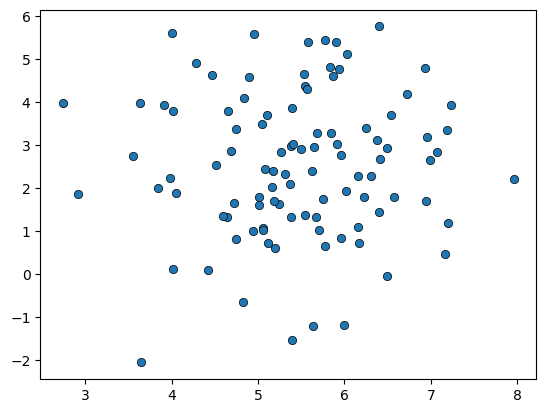

In [ ]:
class Random2DGaussian:
    def __init__(self):
        self.minx = 0
        self.maxx = 10
        self.miny = 0
        self.maxy = 10
        mix = (self.maxx-self.minx) * np.random.random_sample() + self.minx
        miy = (self.maxy-self.miny) * np.random.random_sample() + self.miny
        self.mean = [mix, miy]

        eigvalx = (np.random.random_sample()*(self.maxx - self.minx)/5)**2
        eigvaly = (np.random.random_sample()*(self.maxy - self.miny)/5)**2

        D = np.diag([eigvalx, eigvaly])
        phi = np.random.uniform(0, 2 * np.pi)
        R = np.array([
            [np.cos(phi), -np.sin(phi)],
            [np.sin(phi), np.cos(phi)]
            ])
        self.sigma = R @ D @ R.T

    def get_sample(self, n:int) -> np.array:
        """
        Generate n samples from the 2D Gaussian distribution.

        Parameters:
        n (int): Number of samples to generate.

        Returns:
        np.array: An array of shape (n, 2) containing the generated samples.
        """
        return np.random.multivariate_normal(mean=self.mean, cov=self.sigma, size=n)






if __name__=="__main__":
    np.random.seed(100)
    G=Random2DGaussian()
    X=G.get_sample(100)
    plt.scatter(X[:,0], X[:,1], linewidths=.5, edgecolors="black")
    plt.show()

## 2. zadatak
### 2.a Zadatak
Ponovite binarnu logističku regresiju prema odjeljcima 0d i 0e.

Napišite funkciju `binlogreg_train` koja optimizira parametre logističke regresije
**w** i *b* na zadanom skupu podataka za učenje. U vašem izvornom kodu koristite sljedeća imena:
- X: matrica podataka dimenzija NxD;
- Y_: vektor točnih razreda podataka dimenzija Nx1 (koristimo ga tijekom učenja);
- Y: vektor predviđenih razreda podataka dimenzija Nx1 (koristimo ga tijekom ispitivanja performanse).

Neka funkcija ima sljedeće sučelje:
```python
def binlogreg_train(X,Y_):
  '''
    Argumenti
      X:  podatci, np.array NxD
      Y_: indeksi razreda, np.array Nx1

    Povratne vrijednosti
      w, b: parametri logističke regresije
  '''
```

Upute:

- Inicijalizirajte w prema normalnoj distribuciji N(0,1) (np.random.randn) te b na nulu.
- Otvorite petlju gradijentnog spusta. Broj iteracija postupka zadajte hiper-parametrom `param_niter`.
- Izračunajte klasifikacijske mjere svih podataka na način da petlje prepustite numpyju (scores = np.dot(X, w) + b).
- Izračunajte aposteriorne vjerojatnosti razreda u svim podatcima $P(c_1|X)$ na način da petlje prepustite numpyju
- Izračunajte gubitak $L(w,b)$ na način da petlje prepustite numpyju.
- Izračunajte gradijente `grad_w` i `grad_b` na način da petlje prepustite numpyju.
- Izmijenite parametre u smjeru negativnog gradijenta (neka faktor pomaka `param_delta` bude hiper-parametar postupka).

Struktura vaše izvedbe gradijentnog spusta trebala bi izgledati ovako:
```python
# gradijentni spust (param_niter iteracija)
  for i in range(param_niter):
    # klasifikacijske mjere
    scores = ...    # N x 1
    
    # vjerojatnosti razreda c_1
    probs = ...     # N x 1

    # gubitak
    loss  = ...     # scalar
    
    # dijagnostički ispis
    if i % 10 == 0:
      print("iteration {}: loss {}".format(i, loss))

    # derivacije gubitka po klasifikacijskim mjerama
    dL_dscores = ...     # N x 1
    
    # gradijenti parametara
    grad_w = ...     # D x 1
    grad_b = ...     # 1 x 1

    # poboljšani parametri
    w += -param_delta * grad_w
    b += -param_delta * grad_b
```
Napišite funkciju `binlogreg_classify` koja klasificira zadani skup podataka u skladu sa zadanim parametrima logističke regresije. Neka funkcija ima sljedeće sučelje:
```python
'''
  Argumenti
      X:    podatci, np.array NxD
      w, b: parametri logističke regresije

  Povratne vrijednosti
      probs: vjerojatnosti razreda c1
'''
```

In [ ]:
def binlogreg_train(X:np.array,Y_:np.array, n_iter, delta):
  '''
    Argumenti
      X:  podatci, np.array NxD
      Y_: indeksi razreda, np.array Nx1

    Povratne vrijednosti
      w, b: parametri logističke regresije
  '''
  xs = X.shape if len(X.shape) > 1 else (X.shape[0], 1)
  w = np.random.randn(xs[0], xs[1])
  b = np.zeros(xs[1])
  sigmoid = lambda x: 1/(1+np.exp(-x))

  for i in range(n_iter):
    # klasifikacijske mjere
    scores = X @ w + b    # N x 1

    # vjerojatnosti razreda c_1
    probs = sigmoid(scores)     # N x 1

    # gubitak
    loss  = ...     # scalar

    # dijagnostički ispis
    if i % 10 == 0:
      print("iteration {}: loss {}".format(i, loss))

    # derivacije gubitka po klasifikacijskim mjerama
    dL_dscores = ...     # N x 1

    # gradijenti parametara
    grad_w = ...     # D x 1
    grad_b = ...     # 1 x 1

    # poboljšani parametri
    w += -delta * grad_w
    b += -delta * grad_b

  return w, b


def binlogreg_classify(X, w, b):
  '''
  Argumenti
      X:    podatci, np.array NxD
      w, b: parametri logističke regresije

  Povratne vrijednosti
      probs: vjerojatnosti razreda c1
  '''
  pass


### 2.b zadatak
Napišite funkciju `sample_gauss_2d(C, N)` koja stvara C slučajnih bivarijatnih Gaussovih razdioba (prisjetimo se, njih smo u zadatku 1 implementirali razredom Random2DGaussian), te iz svake od njih uzorkuje N podataka. Funkcija treba vratiti matricu X dimenzija (N·C)x2 čiji retci odgovaraju uzorkovanim podatcima te matricu točnih razreda Y dimenzija (N·C)x1 čiji jedini stupac sadrži indeks razdiobe iz koje je uzorkovan odgovarajući podatak. Ako je i-ti redak matrice X uzorkovan iz razdiobe j, onda mora biti Y[i,0]==j.

Napišite funkciju `eval_perf_binary(Y,Y_)` koja na temelju predviđenih i točnih indeksa razreda određuje pokazatelje performanse binarne klasifikacije: točnost (engl. accuracy), preciznost (engl. precision) te odziv (engl. recall). Implementaciju te funkcije temeljite na brojnostima istinitih pozitiva (TP), lažnih pozitiva (FP), istinith negativa (TN) i lažnih negativa (FN).

Napišite funkciju `eval_AP` koja računa prosječnu preciznost binarne klasifikacije. Neka funkcija na ulazu prima rangiranu listu točnih razreda
$Y_r$ koju dobivamo kad matricu točnih razreda $Y$ sortiramo prema aposteriornim vjerojatnostima odgovarajućih podataka $P(c_1|x)$. Rangiranu listu točnih razreda možete dobiti pozivom metode argsort numpyjevog polja. Prosječnu preciznost možete izračunati primjenom sljedećeg izraza:
$$\text{AP} = \frac{\sum_{i=0}^{N-1} \text{Preciznost}(i) \cdot \mathbf{Y}_{r_i}}{\sum_{i=0}^{N-1} \mathbf{Y}_{r_i}}$$
Pri tome $Preciznost(i)$ odgovara preciznosti u slučaju kad podatke s indeksom većim ili jednakim i pridružimo razredu $c_1$, a podatke s indeksom manjim od i - razredu $c_0$. Evo kako bi se trebala ponašati vaša funkcija:
```python
>>> import data
>>> data.eval_AP([0,0,0,1,1,1])
1.0
>>> data.eval_AP([0,0,1,0,1,1])
0.9166666666666666
>>> data.eval_AP([0,1,0,1,0,1])
0.7555555555555555
>>> data.eval_AP([1,0,1,0,1,0])
0.5
```
Napišite ispitni kod za modul `binlogreg.py`. Formirajte skup za učenje pozivom funkcije `sample_gauss_2d`. Pozovite funkciju za učenje te nakon toga provedite klasifikaciju primjera za učenje. Predviđene vjerojatnosti podataka pretvorite u indekse razreda Y pod pretpostavkom odabira razreda s najvećom vjerojatnošću (izbjegnite petlju u Pythonu!). Ispišite pokazatelje performanse dobivene pozivima funkcija `eval_perf_binary` te `eval_AP`.

Ako vaš postupak ne postiže točnost od 100%, pokušajte naći objašnjenje.

Ako je rezultat prihvatljiv, pohranite kod u datoteku `binlogreg.py`. Funkcije `sample_gauss_2d`, `eval_AP` i `eval_perf_binary` pohranite u datoteku `data.py`.

In [ ]:
### main testni kod
import data
if __name__=="__main__":
    np.random.seed(100)

    # get the training dataset
    X,Y_ = data.sample_gauss_2d(2, 100)

    # train the model
    w,b = binlogreg_train(X, Y_)

    # evaluate the model on the training dataset
    probs = binlogreg_classify(X, w,b)
    Y = # TODO

    # report performance
    accuracy, recall, precision = data.eval_perf_binary(Y, Y_)
    AP = data.eval_AP(Y_[probs.argsort()])
    print (accuracy, recall, precision, AP)

SyntaxError: invalid syntax (164431621.py, line 14)